In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from statsmodels.formula.api import ols

In [2]:
# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


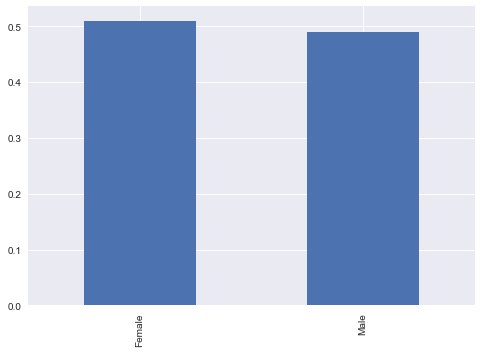

In [4]:
_= df['Gender'].value_counts('Purchased').plot(kind='bar')
plt.show()

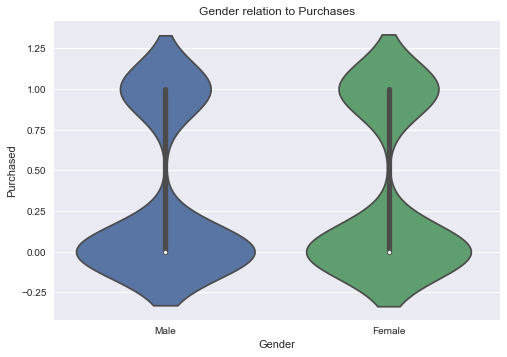

In [5]:
_= sns.violinplot(x= 'Gender', y= 'Purchased', data= df)
_= plt.title('Gender relation to Purchases')
plt.show()

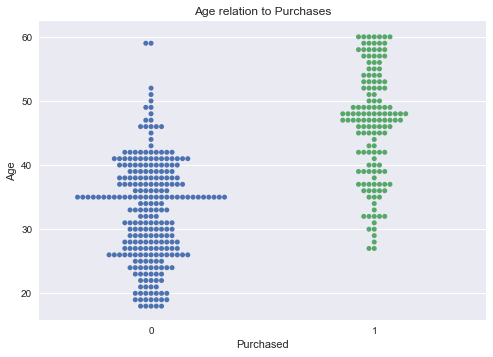

In [6]:
_= sns.swarmplot(x= 'Purchased', y= 'Age', data= df)
_= plt.title('Age relation to Purchases')
plt.show()

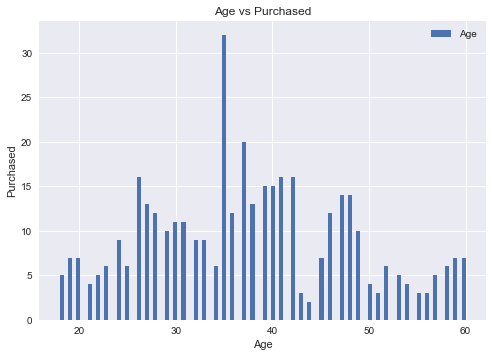

In [7]:
_= df.plot( x='Purchased', y='Age',bins=100, kind='hist')
_= plt.xlabel('Age')
_= plt.ylabel('Purchased')
_= plt.title('Age vs Purchased')
plt.show()

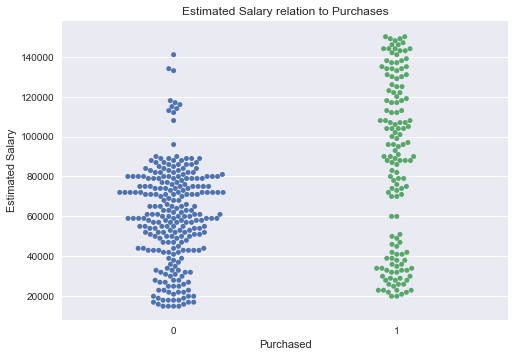

In [8]:
_= sns.swarmplot(x= 'Purchased', y= 'EstimatedSalary', data= df)
_= plt.ylabel('Estimated Salary')
_= plt.title('Estimated Salary relation to Purchases')
plt.show()

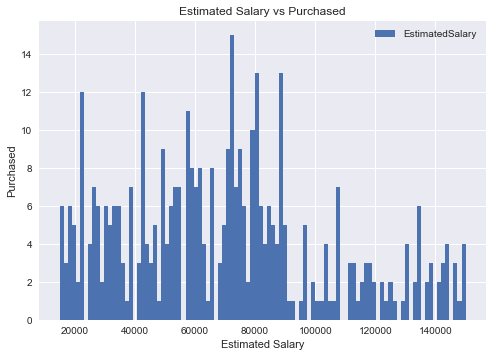

In [9]:
_= df.plot( x='Purchased', y='EstimatedSalary',bins= 100, kind='hist')
_= plt.xlabel('Estimated Salary')
_= plt.ylabel('Purchased')
_= plt.title('Estimated Salary vs Purchased')
plt.show()

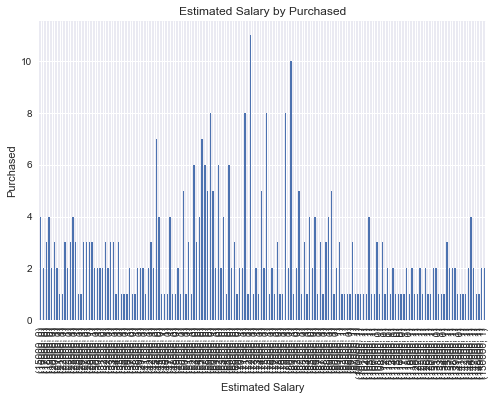

In [10]:
_= df.groupby([df['EstimatedSalary'], df['Purchased']]).size().plot(kind='bar')
_= plt.xlabel('Estimated Salary')
_= plt.ylabel('Purchased')
_= plt.title('Estimated Salary by Purchased')
plt.show()

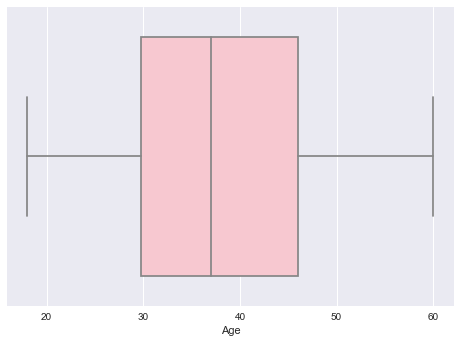

In [11]:
sns.boxplot(x="Age", data = df,color = "pink" )
plt.show()

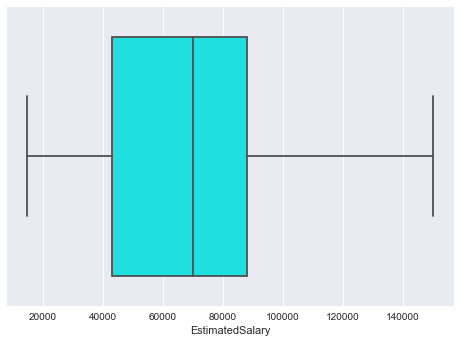

In [12]:
sns.boxplot(x="EstimatedSalary", data = df,color = "aqua" )
plt.show()

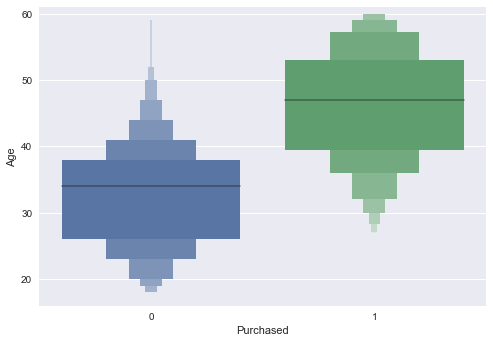

In [13]:
sns.lvplot(x="Purchased", y = "Age", data = df)
plt.show()

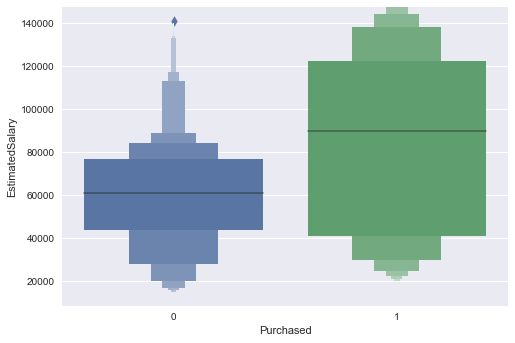

In [14]:
sns.lvplot(x="Purchased", y = "EstimatedSalary", data = df)
plt.show()

In [15]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [16]:
# Correlation of Purchased with Age
r1 = 0.622454

# Correlation of Purchased with Estimated Salary
r2 = 0.362083

In [17]:
# Calculate r squared (Pearson Coefficient)
r1_squared= r1**2
print(r1_squared)

r2_squared= r2**2
print(r2_squared)

0.38744898211599993
0.131104098889


In [18]:
# Total number of Purchased with no missing data
n= df['Purchased'].shape[0]
n

400

* Sample size of 400 allows us to use z-score

In [19]:
t1=(r1*((n-2)/(1-r1**2))**0.5)
print (t1)

t2=(r2*((n-2)/(1-r2**2))**0.5)
print (t2)

15.866373197621407
7.74935928630135


In [20]:
d_f = n-2
d_f

398

In [21]:
p1_value = stats.t.sf(np.abs(t1), d_f)*2  # two-sided pvalue = Prob(abs(t)>tt)
print(p1_value)

p2_value = stats.t.sf(np.abs(t2), d_f)*2  # two-sided pvalue = Prob(abs(t)>tt)
print(p2_value)

2.80046007477e-44
7.77281925036e-14


* With the p-value being so small we can reject the null hypothesis in both instances 
    * Relation of Age to Purchased
    * Relation of Estimated Salary to Purchased
* We can accept the hypothesis that there is significant correlation between Age and Purchased when compared to Estimated Salary and Purchased
* The positive r value of correlation between Purchased and Age and Purchased and Estimated Salary suggests that the impact is significant, as Age and Estimated Salary change there is and impact on Purchased
* The Pearson Coefficient being less than 1% relates that amount of variability in Purchased is impacted by number of discharges
* Pearson Correlation suggests that there is a positive direct correlation between Age and Purchased
* With the p-value being so close to zero for both Age and Estimated Salary we can assume that they are not good predictors of Purchased. Estimated Salary would be a better predictor when compared with Age.
This is an instance of where the p-value provides us with significance but does not reflect on the data, p-value scrutiny

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('Purchased ~ Age + EstimatedSalary', df).fit()
m.summary()

C:\Users\TimusLetap\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Purchased   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     168.9
Date:                Sun, 10 Dec 2017   Prob (F-statistic):           8.61e-54
Time:                        23:41:33   Log-Likelihood:                -150.26
No. Observations:                 400   AIC:                             306.5
Df Residuals:                     397   BIC:                             318.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9096      0.071    -12.778      0.000      -1.050      -0.770
Age                 0.0266      0.002     15.537      0.000       0.023       0.030
EstimatedSalary  3.828e-06   5.26e-07      7.284      0.000    2.79e-06    4.86e-06
==============================================================================
Omnibus:                       13.406   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.744
Skew:                           0.061   Prob(JB):                       0.0343
Kurtosis:                       2.376   Cond. No.                     3.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
def ecdf(df):
    
    # Number of data points: n
    n = len(df)

    # a-data for the ECDF: x
    a = np.sort(df)

    # b-data for the ECDF: y
    b = np.arange(1, n+1) / n

    return a, b

In [ ]:
a1, b1 = ecdf(df['Age'])

# Generate plot
_ = plt.plot(a1, b1, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Age')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Age'), loc= 'lower right')

# Display the plot
plt.show()

In [ ]:
a2, b2 = ecdf(df['EstimatedSalary'])

# Generate plot
_ = plt.plot(a2, b2, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Estimated Salary')
_ = plt.ylabel('ECDF')
_ = plt.legend(('EstimatedSalary'), loc= 'lower right')

# Display the plot
plt.show()

### Dataset 
  * Social Network Ads 
      * Want to understand the metrics that go into Social Network Ad Campaigns
      * Is there a more efficient way to measure?
      * How to understand which metric would be more efficient?


### Can you count something interesting?
* Purchases can be counted 
    * Factors that impact purchases:
        * Gender
        * Age
        * Estimated Salary

### Can you find some trends (high, low, increase, decrease, anomalies)?
    * Initial observation with Gender against Purchases yielded no significant differences
    * This shows that Gender is not a significant measure of impact on Purchases
    * Observed with histogram, box plot, ecdf, scatter plot, letter value plot, violin plot


Can you make a bar plot or a histogram?
   * Yes, histogram was used (both were possible)

Can you compare two related quantities?
   * Initial comparison was between gender and purchases
   * Comparison between Estimated Salary and Purchased
   * Comparison between Age and Purchased
   * Comparison between Estimated Salary and Age

Can you make a scatterplot?
   * Yes, helps to observe and highlight comparisons

Can you make a time-series plot?
   * Time series plot is not possible because there is no time relevant data 

Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?
   * Age and Estimated Salary both impact Purchased
   * Correlation significance is high with Estimated Salary and Age with respect to Purchased
       * Hypothesis:
           * Age and Estimated Salary impact Purchased
       * Null Hypothesis:
           * Age and Estimated Salary do not impact Purchased

By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?
   * The impact from gender is not particularly of any statistical significance with respect to Purchased which shows that the product or campaign is not particularly driven to a specific gender class. This is beneficial as one gender does not have to be prioritized over the other (nearly equal significance and impact on Purchased). 
   * Both Age and Estimated Salary have significant impact on Purchased. Isolating and observing the two and their individual impact on Purchased we can observe that Estimated Salary has a significantly higher Purchased rate than Age. The Age range is expansive when compared to the range of Estimated Salary when observing the boxplot. There is a bias in Age of age group where Estimated Salary encompasses a large range. We can gather that Estimated Salary when emphasized with Purchased would generate a more efficient outcome. When combined Estimated Salary and Age can be very useful predictors and indicators for Purchased. A correlation plot with a trendline based on Purchased may be useful for creating a more predictable observation. 

Submission Requirements: Submit links to a Github repository containing a Jupyter notebook. The notebook should contain:
The questions you asked
The trends you investigated
The resulting visualizations and conclusions.

In [ ]:
pd.tools.plotting.scatter_matrix(df.iloc[:, 2:5], diagonal="kde")
plt.tight_layout()
plt.show()